In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [490]:
df=pd.read_csv('train_housing.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [491]:
df1=pd.read_csv('test_housing.csv')
df1.shape

(292, 80)

In [492]:
pd.set_option('display.max_columns',None)

In [493]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [494]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [495]:
for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
214
0
0
1091
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
7
0
0
0
30
30
31
30
0
31
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
551
64
64
64
0
0
64
64
0
0
0
0
0
0
0
1161
931
1124
0
0
0
0
0
0


In [496]:
for i in df.columns:
    if df[i].isnull().sum()>1000:
        print(i)
        
#these columns has almost all values as null.
#So we are dropping these columns from both the dataset.

Alley
PoolQC
MiscFeature


In [497]:
df=df.drop(columns=['Alley','PoolQC','MiscFeature'],axis=1)

In [498]:
df1=df1.drop(columns=['Alley','PoolQC','MiscFeature'],axis=1)

In [499]:
for i in df.columns:
    if df[i].isnull().sum()>500:
        print(i)

FireplaceQu
Fence


In [500]:
df=df.drop(columns=['FireplaceQu','Fence'],axis=1)
df1=df1.drop(columns=['FireplaceQu','Fence'],axis=1)

In [501]:
for i in df.columns:
    print(df[i].isnull().sum())

0
0
0
214
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
7
0
0
0
30
30
31
30
0
31
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
64
64
64
0
0
64
64
0
0
0
0
0
0
0
0
0
0
0
0
0


# EDA

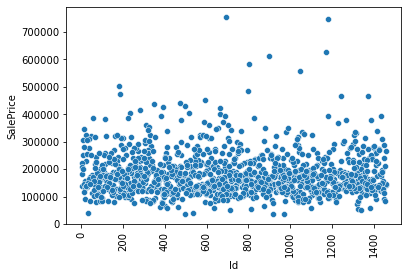

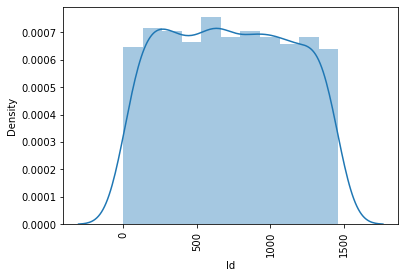

In [502]:
sns.scatterplot(df['Id'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(df['Id'])
plt.xticks(rotation=90)
plt.show()


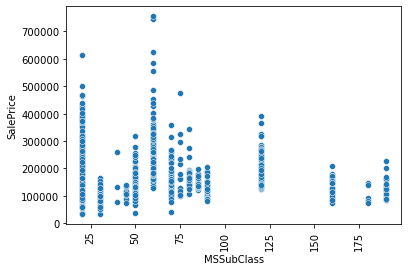

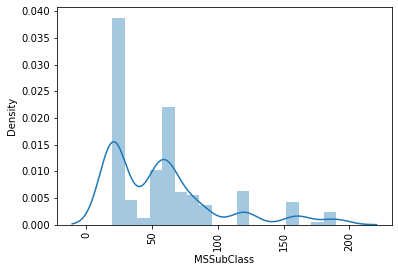

In [503]:
sns.scatterplot(df['MSSubClass'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(df['MSSubClass'])
plt.xticks(rotation=90)
plt.show()

#1-STORY 1946 & NEWER ALL STYLES has higher price
#2-STORY 1946 & NEWER has higher price.

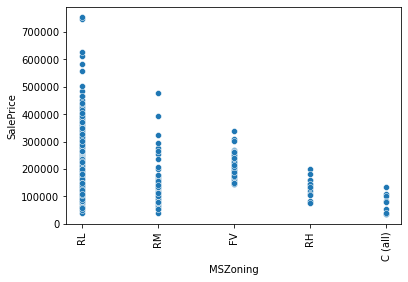

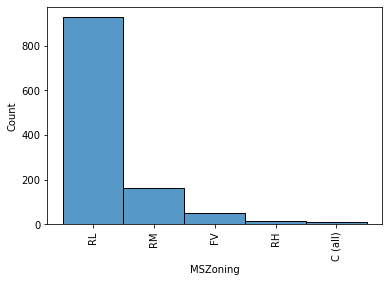

In [504]:
sns.scatterplot(df['MSZoning'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(df['MSZoning'])
plt.xticks(rotation=90)
plt.show()

#Residential Low Density houses can be sold at higher prices.
# Commercial(all) are generally sold at very low price.(Also present in very low numbers)


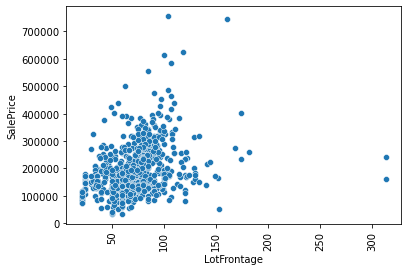

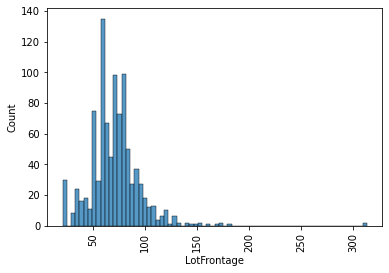

In [505]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(df['LotFrontage'])
plt.xticks(rotation=90)
plt.show()

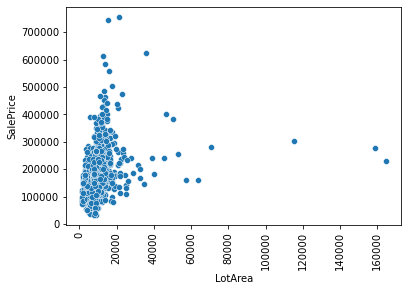

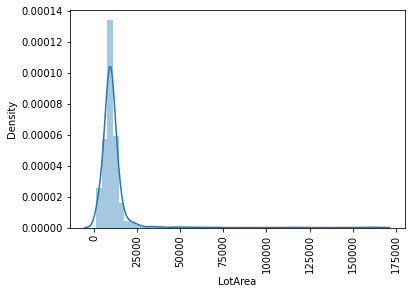

10.659284548299626


In [506]:
a=df['LotArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

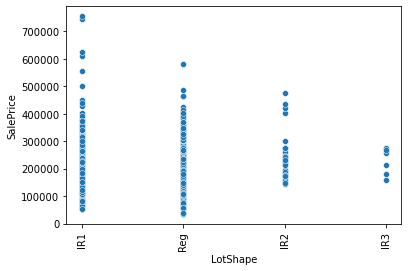

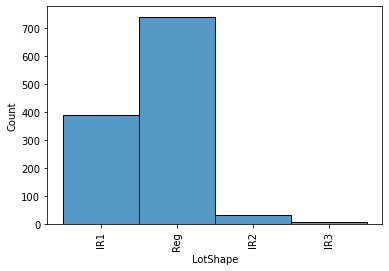

In [507]:
a=df['LotShape']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()


#irregular lot shape has lower price.
#most properties has regular lot size.

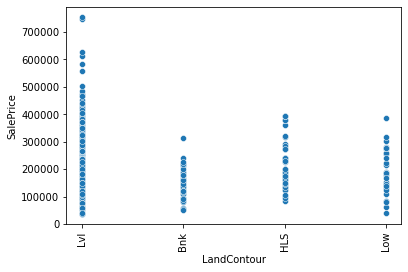

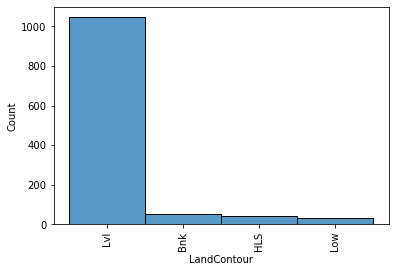

In [508]:
a=df['LandContour']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#level properties can be sold at higher price.

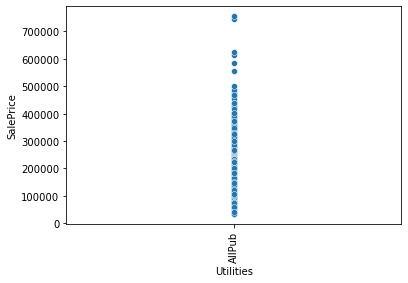

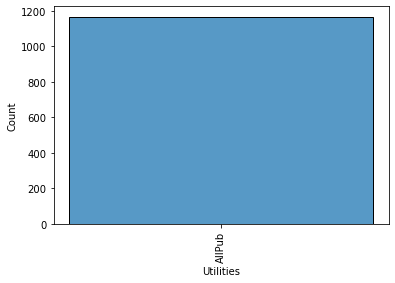

array(['AllPub'], dtype=object)

In [509]:
a=df['Utilities']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

df['Utilities'].unique()

#All the properties has all public utilities.
# Since all the properties has All public utilities

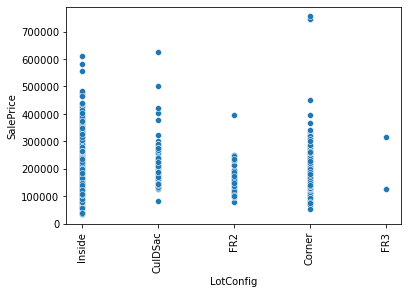

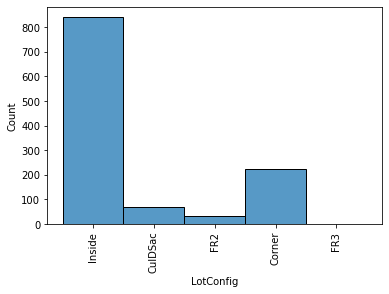

['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']


In [510]:
a=df['LotConfig']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

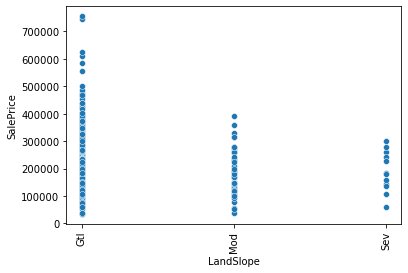

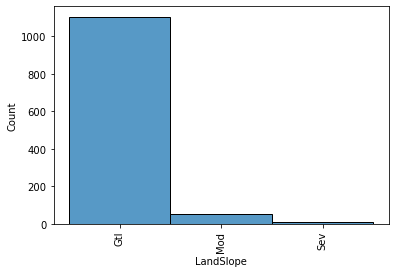

['Gtl' 'Mod' 'Sev']


In [511]:
a=df['LandSlope']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#most buildings have gentle slope and they can be sold at higher price.

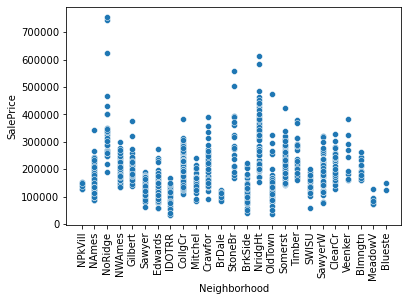

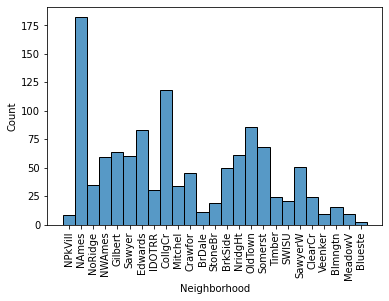

['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']


In [512]:
a=df['Neighborhood']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

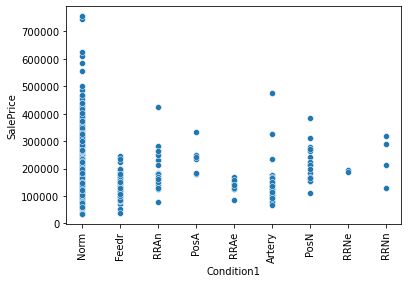

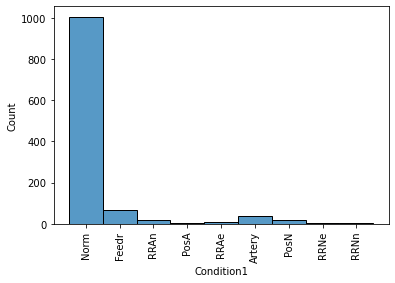

['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']


In [513]:
a=df['Condition1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

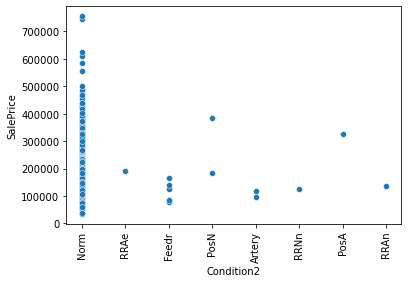

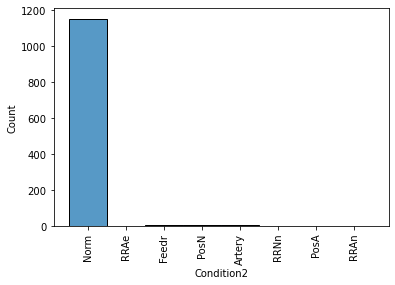

['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']


In [514]:
a=df['Condition2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

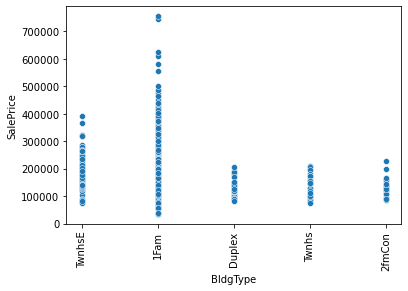

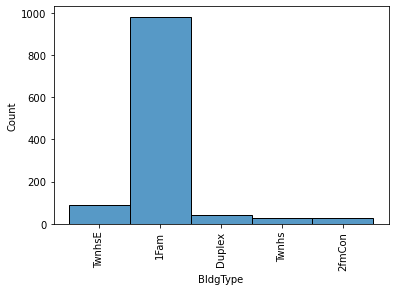

['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']


In [515]:
a=df['BldgType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#single family detached buildings can be sold at a higher price.

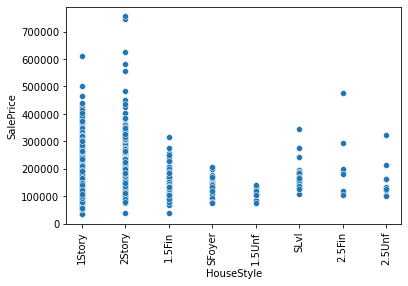

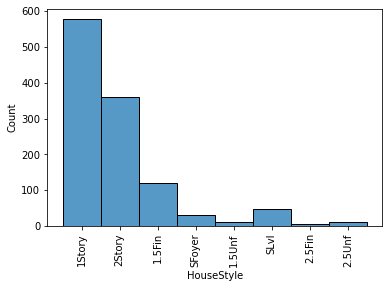

['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']


In [516]:
a=df['HouseStyle']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

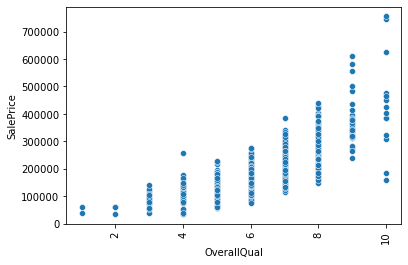

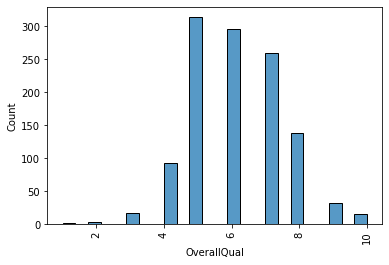

0.1750824992845271


In [517]:
a=df['OverallQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price shows increse with overall quality.

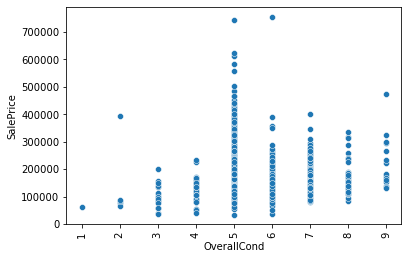

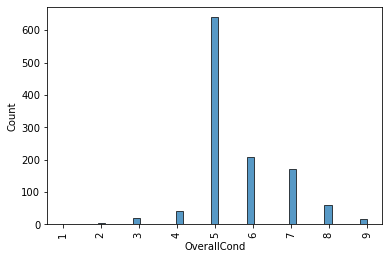

0.5807139655333367


In [518]:
a=df['OverallCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price normally shows increase with overall condition.
#Overall condition=5 can show exceptionally high price.

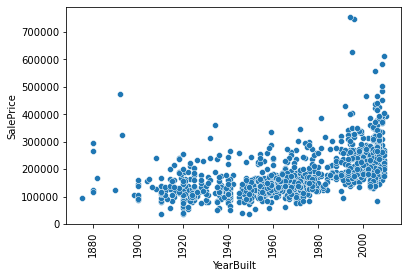

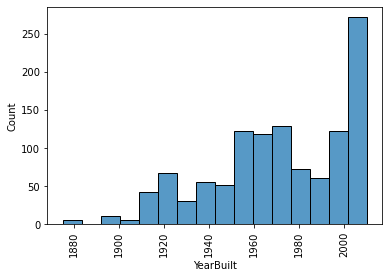

-0.5792035025736898


In [519]:
a=df['YearBuilt']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#Selling price is hgiher for newer buildings.

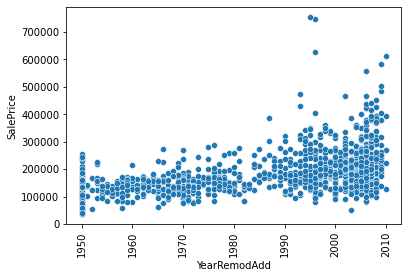

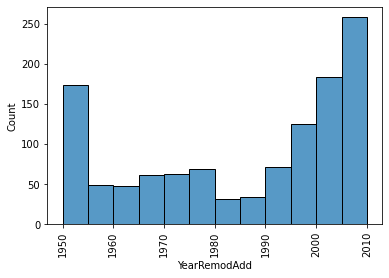

-0.49586353822203716


In [520]:
a=df['YearRemodAdd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price is higher for newly remodelled house.

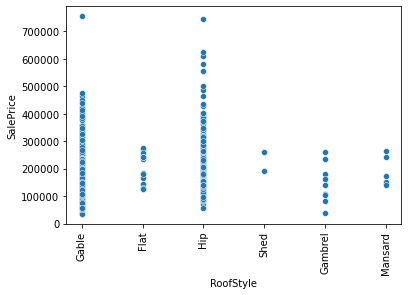

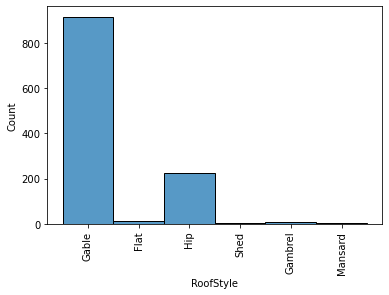

In [521]:
a=df['RoofStyle']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#'Hip' roofstyled buildings can be sold at a higher price followed by 'Gable'

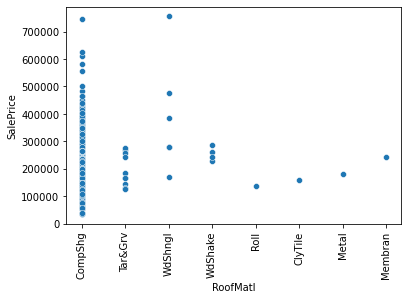

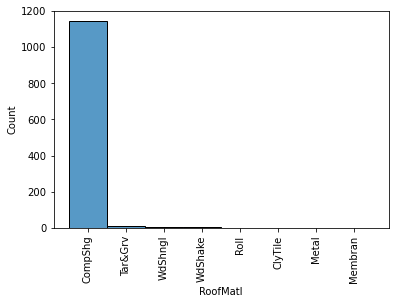

In [522]:
a=df['RoofMatl']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#buildings with roof material 'CompShg' and 'WdShngl' can be sold at a higher price.

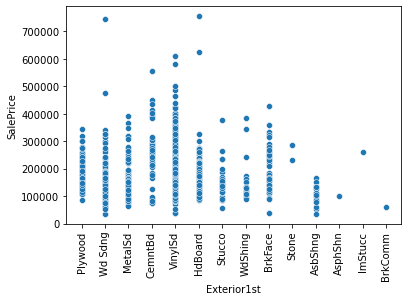

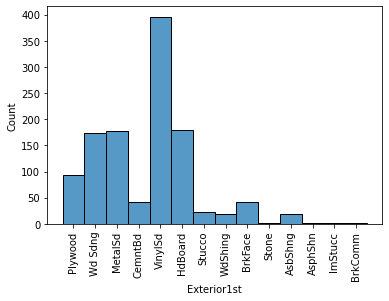

In [523]:
a=df['Exterior1st']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

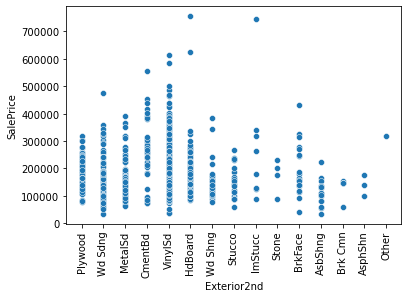

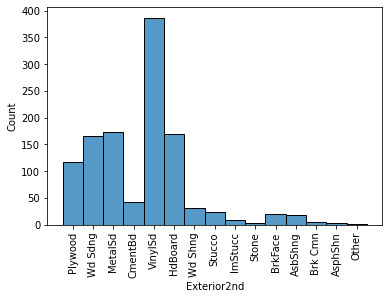

In [524]:
a=df['Exterior2nd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

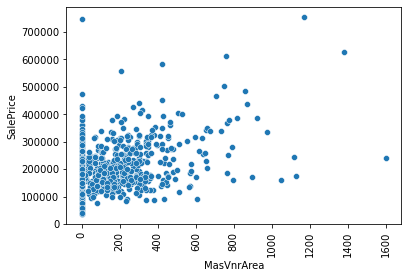

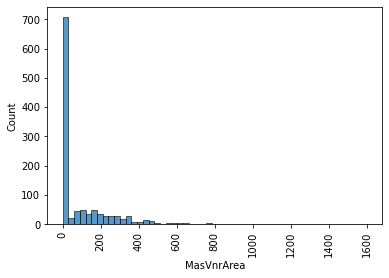

In [525]:
a=df['MasVnrArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#most buildings dont have masonry veneer area.
#price increases with masonry veneer area.

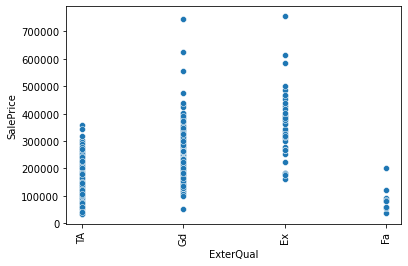

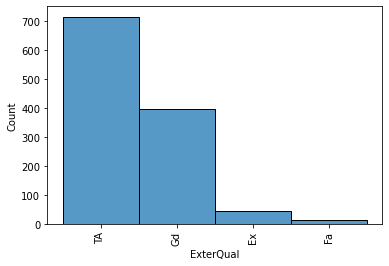

In [526]:
a=df['ExterQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#buildings having excellent exterior quality has higher price.

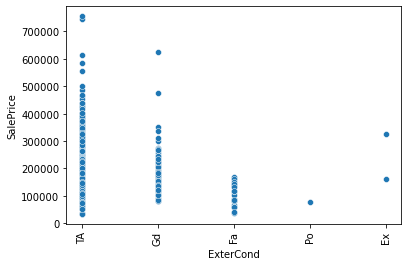

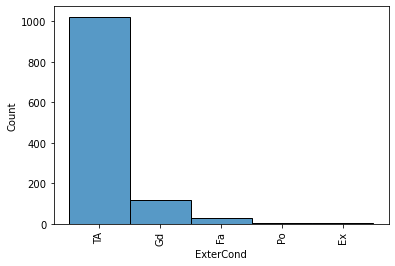

In [527]:
a=df['ExterCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

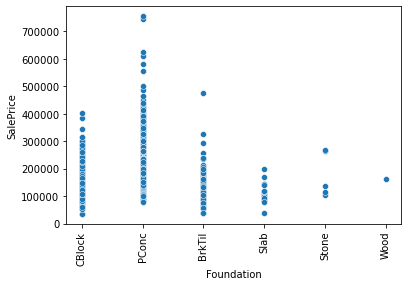

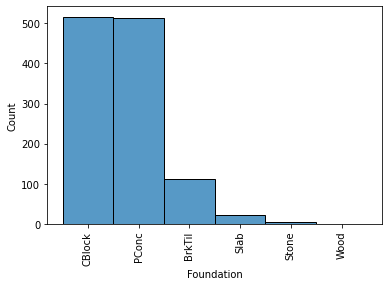

In [528]:
a=df['Foundation']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#Poured concrete buildings has higher price.

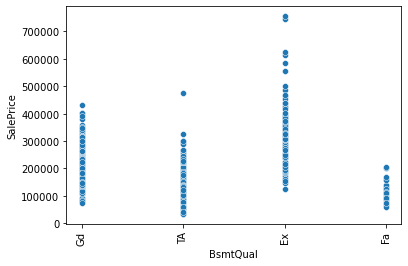

In [529]:
a=df['BsmtQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#better basement hgiher price.

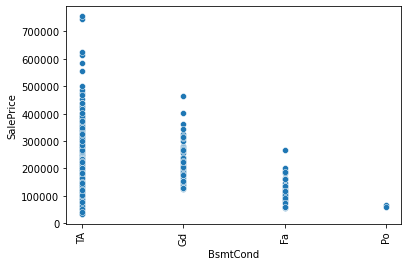

In [530]:
a=df['BsmtCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#no buildings have excellent basement condition.
#better the basement condition, higher  the price.



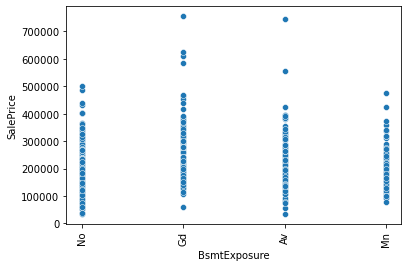

In [531]:
a=df['BsmtExposure']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not varying much with basement exposure.

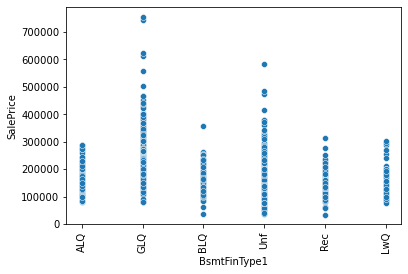

In [532]:
a=df['BsmtFinType1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#basement finishing type 'GLQ' has a slightly higher price

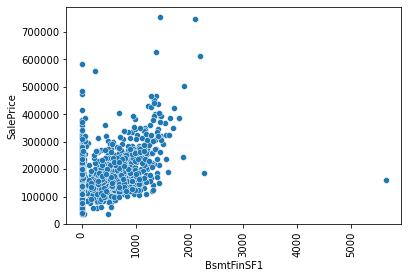

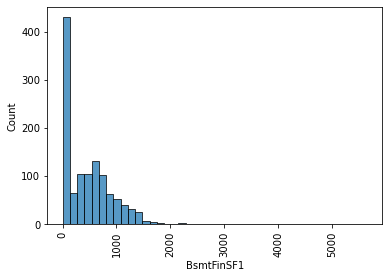

In [533]:
a=df['BsmtFinSF1']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#very hgih number of buildings has no finishing in basement
#price increases with basement finished area.

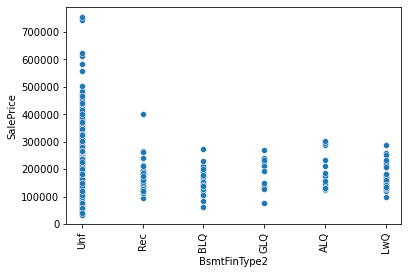

In [534]:
a=df['BsmtFinType2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#basement finishing type2 'Unf' has a higher price

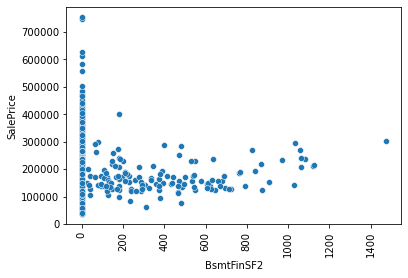

In [535]:
a=df['BsmtFinSF2']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not varying much with basement finished area 2.

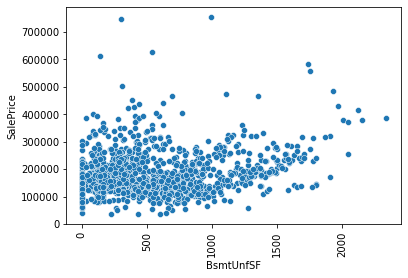

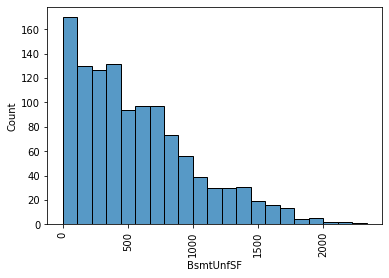

In [536]:
a=df['BsmtUnfSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#very few buildings are present where unfinished basement area is very low.

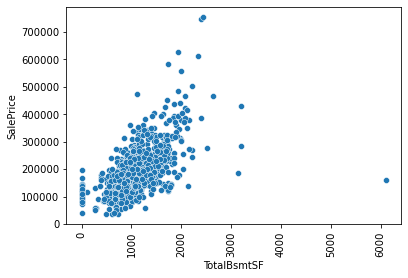

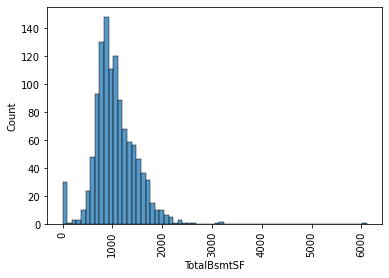

In [537]:
a=df['TotalBsmtSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#price is increasing with total basement surface area.

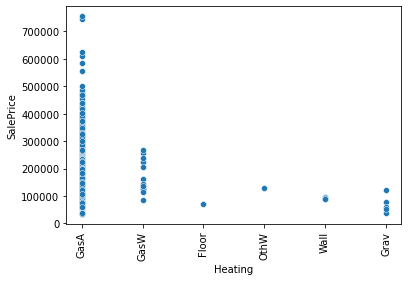

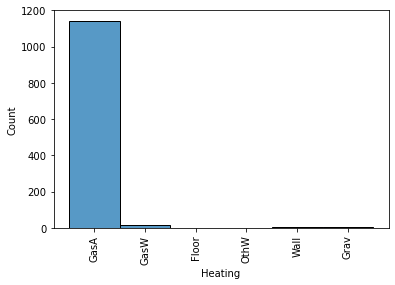

In [538]:
a=df['Heating']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

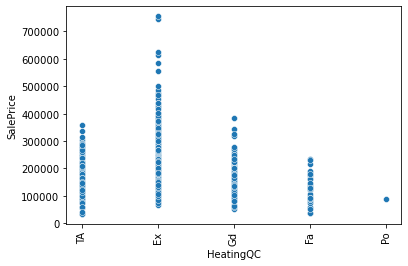

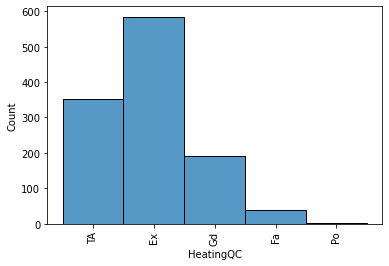

In [539]:
a=df['HeatingQC']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#better heating quality and condition gives better price.

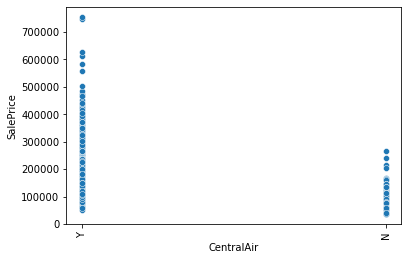

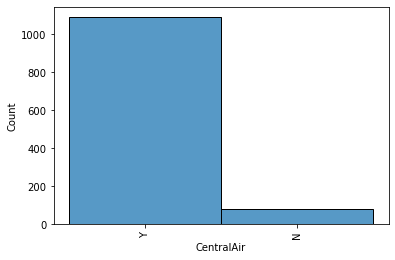

In [540]:
a=df['CentralAir']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#Most buildings have central air conditioner.
#centrally air conditioned buildings has higher price.

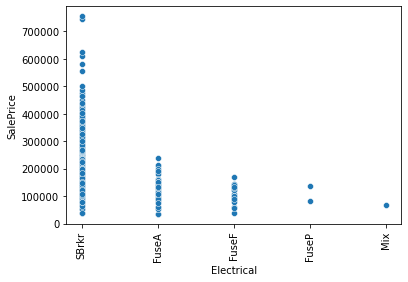

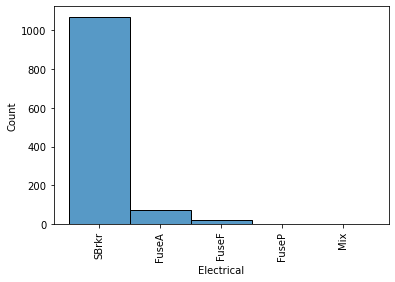

In [541]:
a=df['Electrical']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

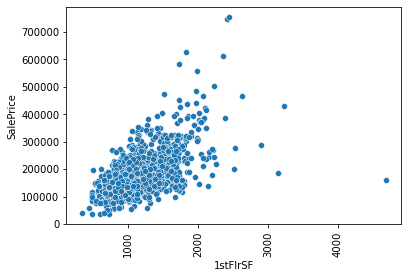

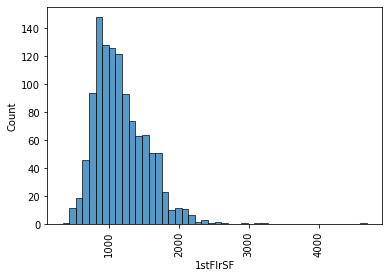

1.5137072331415693


In [542]:
a=df['1stFlrSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

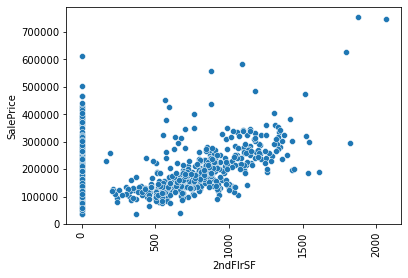

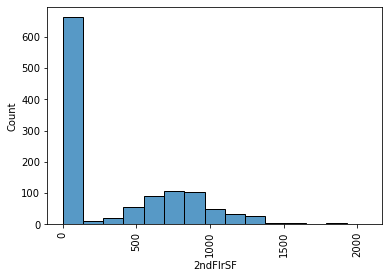

0.8234785103609108


In [543]:
a=df['2ndFlrSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#many buildings has no surface finish in second floor. 

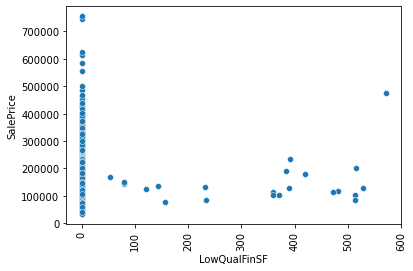

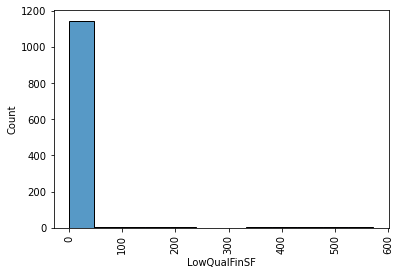

8.666142302049042


In [544]:
a=df['LowQualFinSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#low quality finished surface is less in most buildings.
#high skewness present

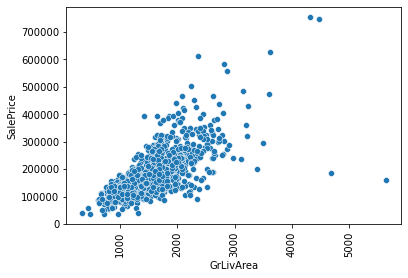

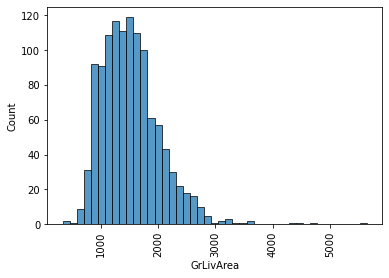

1.4499515426476701


In [545]:
a=df['GrLivArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

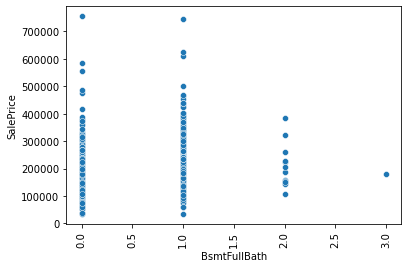

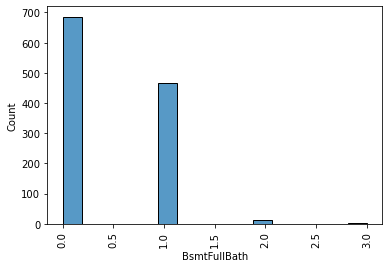

0.6271059162466773


In [546]:
a=df['BsmtFullBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

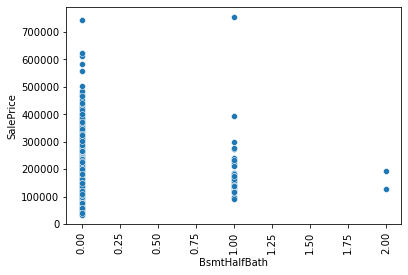

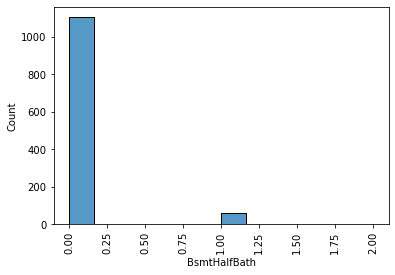

4.264402760829792


In [547]:
a=df['BsmtHalfBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#most buildings dont have half-bathrooms in basement 

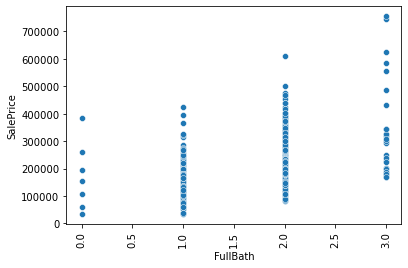

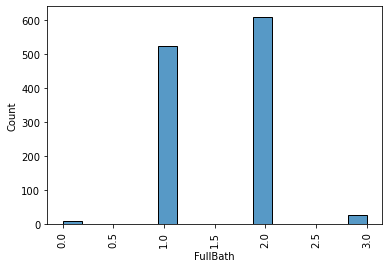

0.05780870861471475


In [548]:
a=df['FullBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#buildings with more number of bathrooms has higher price.

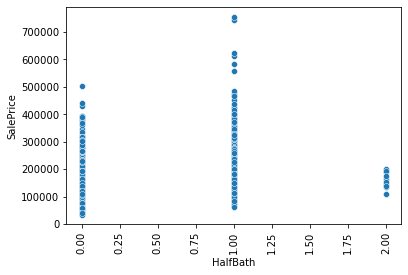

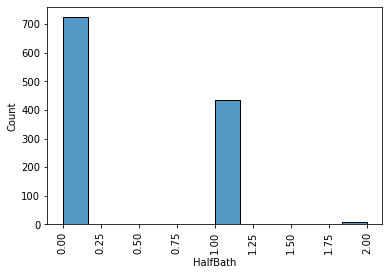

0.6564917514090118


In [549]:
a=df['HalfBath']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#half bath is not effecting the price much.

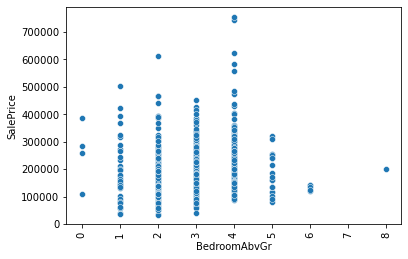

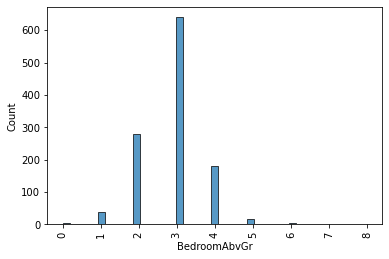

0.2438552945621391


In [550]:
a=df['BedroomAbvGr']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())


#buildings having 4 bed rooms above ground has slightly higher price.

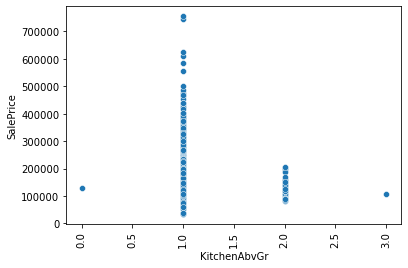

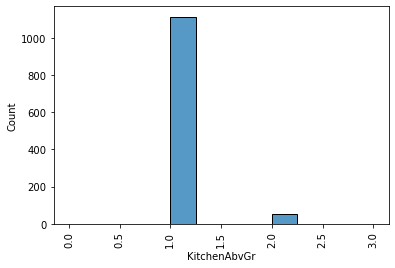

4.365258908133523


In [551]:
a=df['KitchenAbvGr']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#most buildings has single kitchen and it is not effecting the price much.

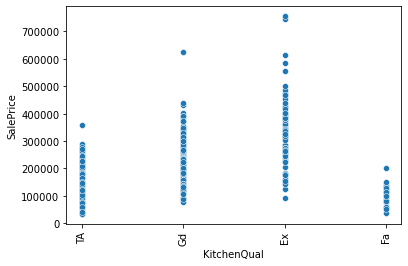

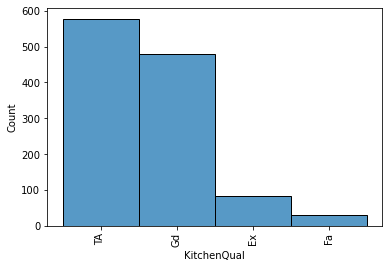

['TA' 'Gd' 'Ex' 'Fa']


In [552]:
a=df['KitchenQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#higher price is obtained for better kitchen quality.

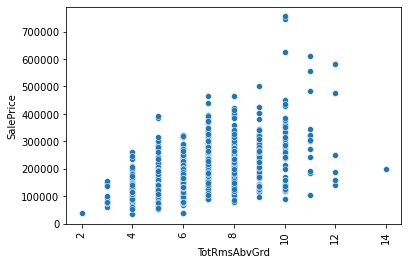

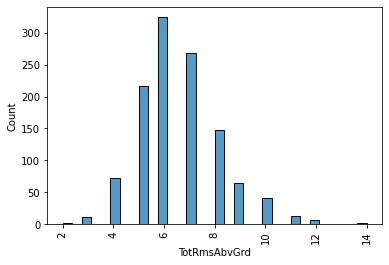

[ 5  8  7  9  6 12  4  2  3 10 11 14]


In [553]:
a=df['TotRmsAbvGrd']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price increases as the number of total rooms above ground inecreases.

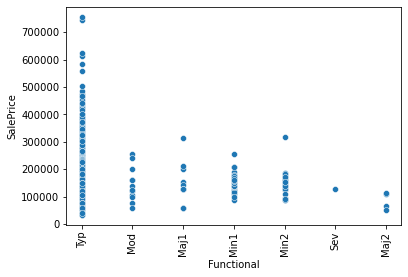

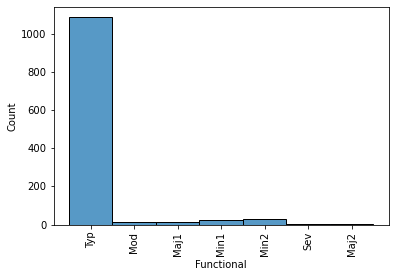

['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']


In [554]:
a=df['Functional']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price decreases  significantly if functionality is lower than 'typical'

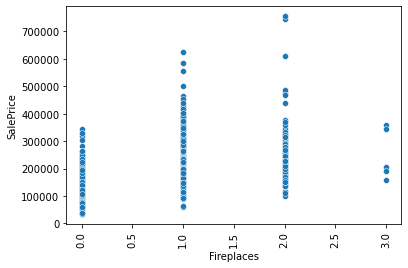

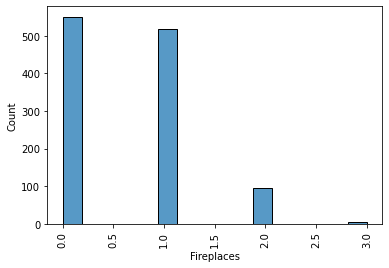

[1 0 2 3]


In [555]:
a=df['Fireplaces']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.unique())

#price increases shightly if atleast one fireplace is present
#price decreases if number of fireplaces is very high(ex-3)

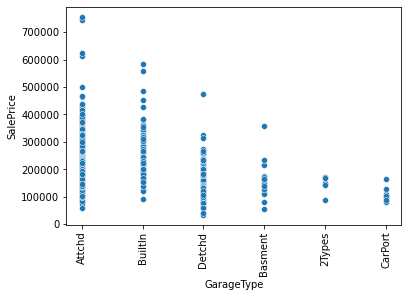

['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']


In [556]:
a=df['GarageType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()



print(a.unique())

#Properties with attached and built in garages has higher price.

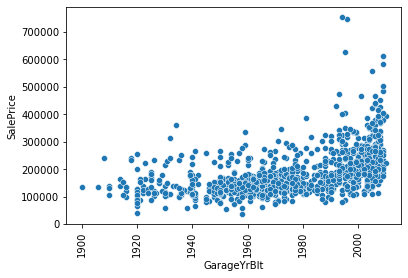

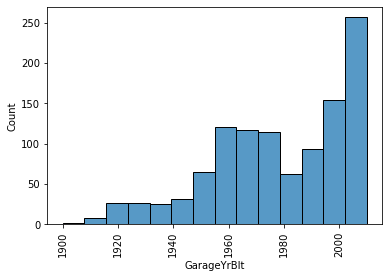

-0.6445640197769343


In [557]:
a=df['GarageYrBlt']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#properties with newer garages has higher price.

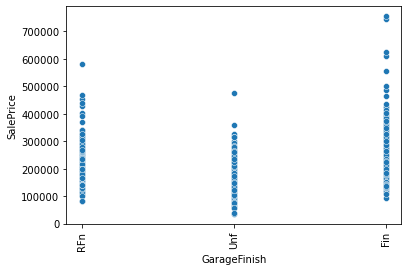

In [558]:
a=df['GarageFinish']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#prices increases slightlt with better finishing of garages.


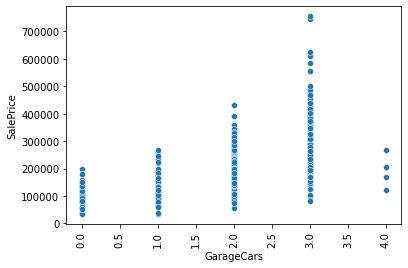

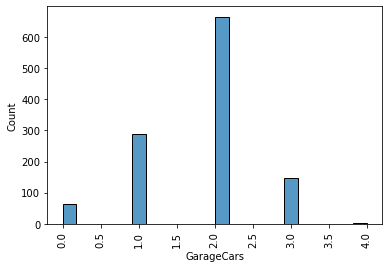

-0.3585558146314816


In [559]:
a=df['GarageCars']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

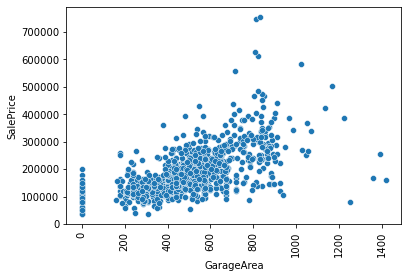

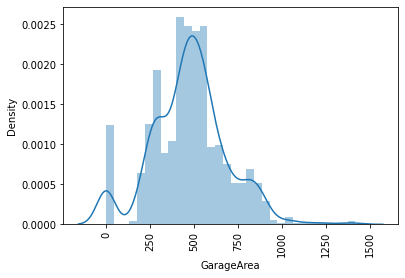

0.18966497539008143


In [560]:
a=df['GarageArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.distplot(a)
plt.xticks(rotation=90)
plt.show()

print(a.skew())

#price increases with garage area.

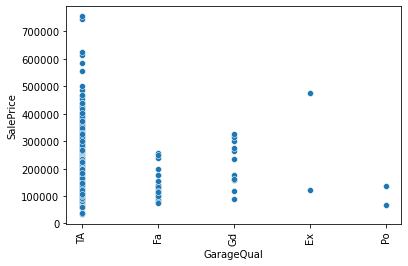

In [561]:
a=df['GarageQual']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


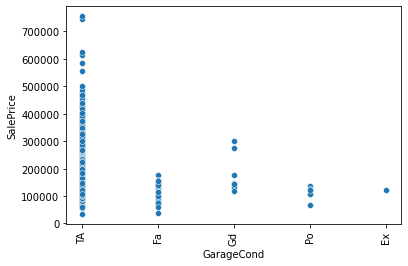

In [562]:
a=df['GarageCond']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()

#price is not depending much on garage condition.

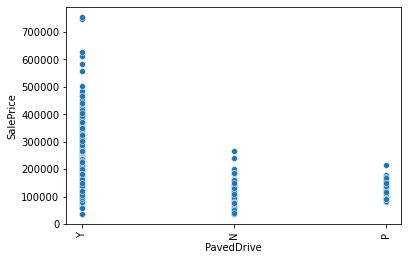

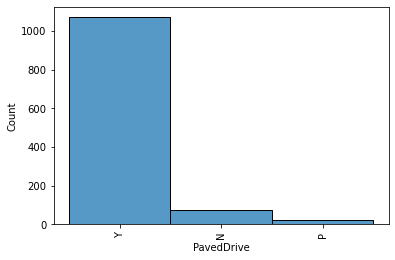

In [563]:
a=df['PavedDrive']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#mostly paved.
#paved has more price

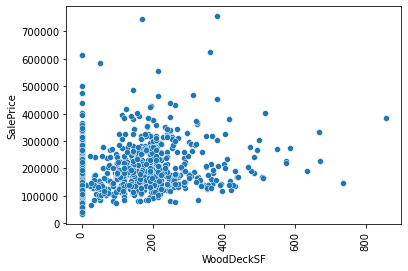

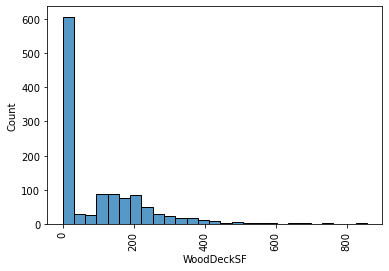

In [564]:
a=df['WoodDeckSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#better wood deck surface finish gives better price.

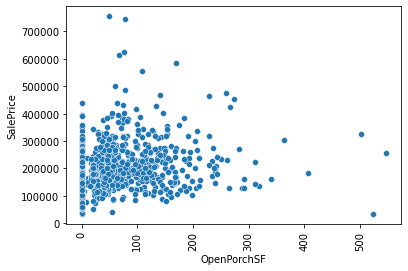

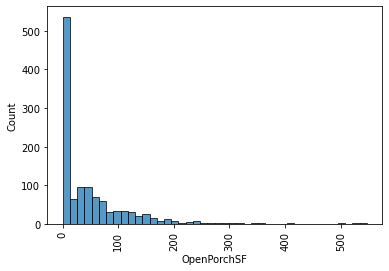

In [565]:
a=df['OpenPorchSF']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

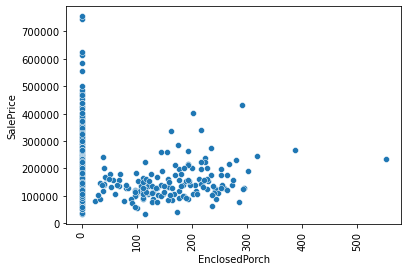

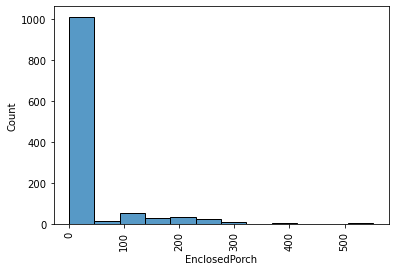

In [566]:
a=df['EnclosedPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

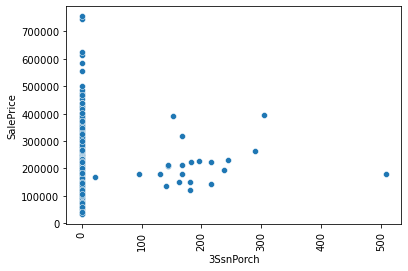

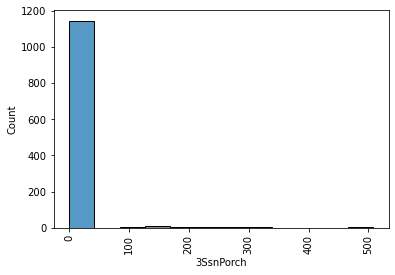

In [567]:
a=df['3SsnPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

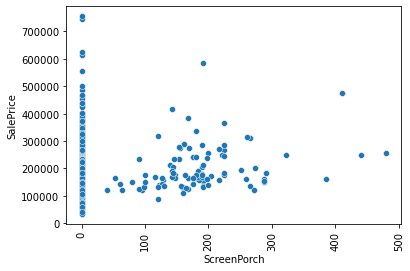

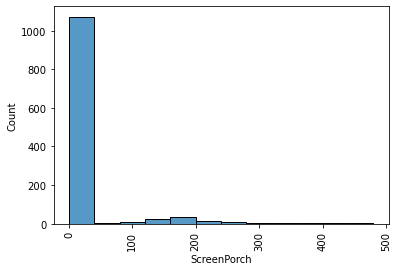

In [568]:
a=df['ScreenPorch']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

#increases price

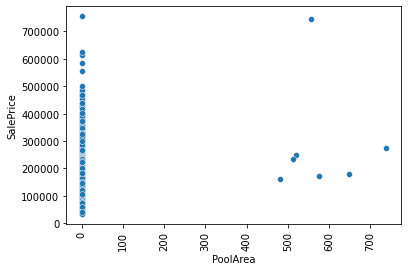

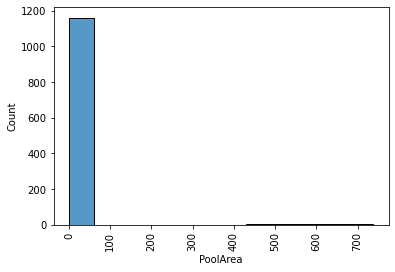

In [569]:
a=df['PoolArea']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()



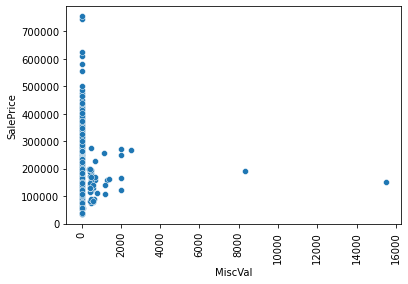

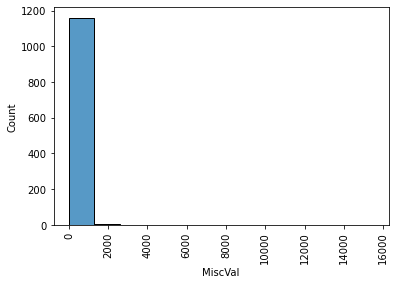

In [570]:
a=df['MiscVal']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

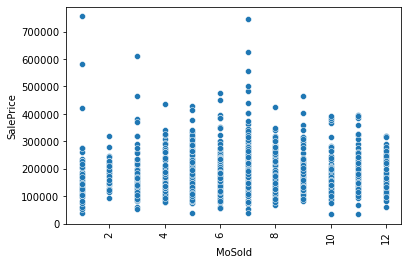

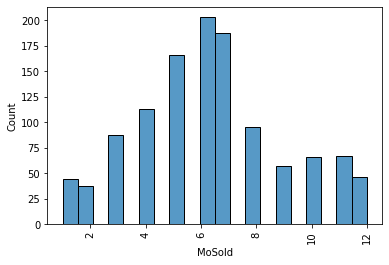

In [571]:
a=df['MoSold']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

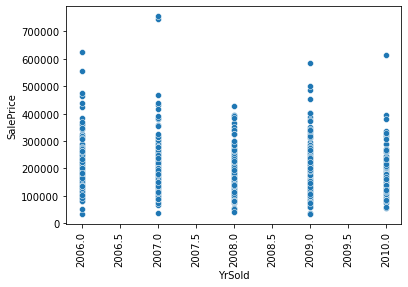

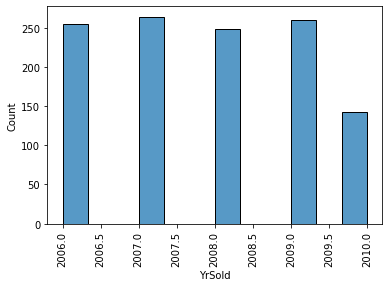

In [572]:
a=df['YrSold']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

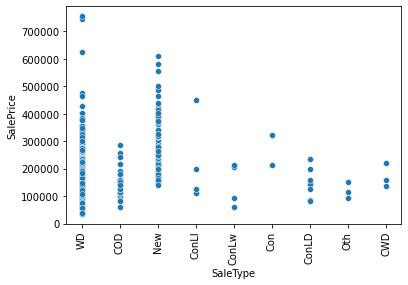

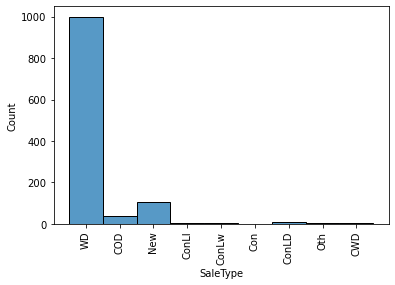

In [573]:
a=df['SaleType']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

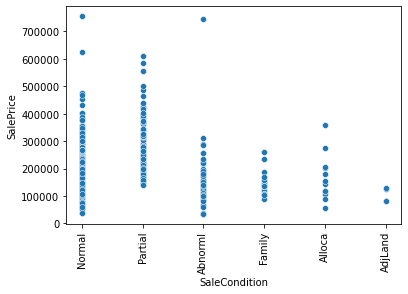

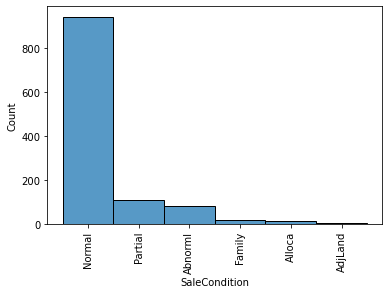

In [574]:
a=df['SaleCondition']
sns.scatterplot(a,df['SalePrice'])
plt.xticks(rotation=90)
plt.show()


sns.histplot(a)
plt.xticks(rotation=90)
plt.show()

# Data PreProcessing

In [575]:
for i in df.columns:
    print(i,'----->',df[i].isnull().sum())

Id -----> 0
MSSubClass -----> 0
MSZoning -----> 0
LotFrontage -----> 214
LotArea -----> 0
Street -----> 0
LotShape -----> 0
LandContour -----> 0
Utilities -----> 0
LotConfig -----> 0
LandSlope -----> 0
Neighborhood -----> 0
Condition1 -----> 0
Condition2 -----> 0
BldgType -----> 0
HouseStyle -----> 0
OverallQual -----> 0
OverallCond -----> 0
YearBuilt -----> 0
YearRemodAdd -----> 0
RoofStyle -----> 0
RoofMatl -----> 0
Exterior1st -----> 0
Exterior2nd -----> 0
MasVnrType -----> 7
MasVnrArea -----> 7
ExterQual -----> 0
ExterCond -----> 0
Foundation -----> 0
BsmtQual -----> 30
BsmtCond -----> 30
BsmtExposure -----> 31
BsmtFinType1 -----> 30
BsmtFinSF1 -----> 0
BsmtFinType2 -----> 31
BsmtFinSF2 -----> 0
BsmtUnfSF -----> 0
TotalBsmtSF -----> 0
Heating -----> 0
HeatingQC -----> 0
CentralAir -----> 0
Electrical -----> 0
1stFlrSF -----> 0
2ndFlrSF -----> 0
LowQualFinSF -----> 0
GrLivArea -----> 0
BsmtFullBath -----> 0
BsmtHalfBath -----> 0
FullBath -----> 0
HalfBath -----> 0
BedroomAbvGr -----

In [576]:
columns_nan=[]
for i in df.columns:
    if df[i].isnull().sum()>1:
        columns_nan.append(i)

In [577]:
columns_nan

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [578]:
a='LotFrontage'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

LotFrontage
float64
70.98846960167715
70.0
0    60.0
dtype: float64


In [579]:
df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)

In [580]:
df1['LotFrontage'].fillna(value=df1['LotFrontage'].mean(), inplace=True)

In [581]:
a='MasVnrType'
print(a)
print(df[a].dtype)
print(df[a].mode())

MasVnrType
object
0    None
dtype: object


In [582]:
df['MasVnrType'].fillna(value=df['MasVnrType'].mode(), inplace=True)
df1['MasVnrType'].fillna(value=df1['MasVnrType'].mode(), inplace=True)

In [583]:
a='MasVnrArea'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

MasVnrArea
float64
102.31007751937985
0.0
0    0.0
dtype: float64


In [584]:
df['MasVnrArea'].fillna(value=df['MasVnrArea'].mode(), inplace=True)
df1['MasVnrArea'].fillna(value=df1['MasVnrArea'].mode(), inplace=True)

In [585]:
a='BsmtQual'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtQual
object
0    TA
dtype: object


In [586]:
df['BsmtQual'].fillna(value=df['BsmtQual'].mode(), inplace=True)
df1['BsmtQual'].fillna(value=df1['BsmtQual'].mode(), inplace=True)

In [587]:
a='BsmtCond'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtCond
object
0    TA
dtype: object


In [588]:
df['BsmtCond'].fillna(value=df['BsmtCond'].mode(), inplace=True)
df1['BsmtCond'].fillna(value=df1['BsmtCond'].mode(), inplace=True)

In [589]:
a='BsmtExposure'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtExposure
object
0    No
dtype: object


In [590]:
df['BsmtExposure'].fillna(value=df['BsmtExposure'].mode(), inplace=True)
df1['BsmtExposure'].fillna(value=df1['BsmtExposure'].mode(), inplace=True)

In [591]:
columns_nan

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [592]:
a='BsmtFinType1'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtFinType1
object
0    Unf
dtype: object


In [593]:
df['BsmtFinType1'].fillna(value=df['BsmtFinType1'].mode(), inplace=True)
df1['BsmtFinType1'].fillna(value=df1['BsmtFinType1'].mode(), inplace=True)

In [594]:
a='BsmtFinType2'
print(a)
print(df[a].dtype)
print(df[a].mode())

BsmtFinType2
object
0    Unf
dtype: object


In [595]:
df['BsmtFinType2'].fillna(value=df['BsmtFinType2'].mode(), inplace=True)
df1['BsmtFinType2'].fillna(value=df1['BsmtFinType2'].mode(), inplace=True)

In [596]:
a='GarageType'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageType
object
0    Attchd
dtype: object


In [597]:
df['GarageType'].fillna(value=df['GarageType'].mode(), inplace=True)
df1['GarageType'].fillna(value=df1['GarageType'].mode(), inplace=True)

In [599]:
a='GarageYrBlt'
print(a)
print(df[a].dtype)
print(df[a].mean())
print(df[a].median())
print(df[a].mode())

GarageYrBlt
float64
1978.1938405797102
1980.0
0    2006.0
dtype: float64


In [600]:
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].median(), inplace=True)
df1['GarageYrBlt'].fillna(value=df1['GarageYrBlt'].median(), inplace=True)

In [602]:
a='GarageFinish'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageFinish
object
0    Unf
dtype: object


In [603]:
df['GarageFinish'].fillna(value=df['GarageFinish'].mode(), inplace=True)
df1['GarageFinish'].fillna(value=df1['GarageFinish'].mode(), inplace=True)

In [605]:
a='GarageQual'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageQual
object
0    TA
dtype: object


In [606]:
df['GarageQual'].fillna(value=df['GarageQual'].mode(), inplace=True)
df1['GarageQual'].fillna(value=df1['GarageQual'].mode(), inplace=True)

In [607]:
a='GarageCond'
print(a)
print(df[a].dtype)
print(df[a].mode())

GarageCond
object
0    TA
dtype: object


In [608]:
df['GarageCond'].fillna(value=df['GarageCond'].mode(), inplace=True)
df1['GarageCond'].fillna(value=df1['GarageCond'].mode(), inplace=True)

In [609]:
for i in df.columns:
    print(i,'---->',df[i].dtypes)

Id ----> int64
MSSubClass ----> int64
MSZoning ----> object
LotFrontage ----> float64
LotArea ----> int64
Street ----> object
LotShape ----> object
LandContour ----> object
Utilities ----> object
LotConfig ----> object
LandSlope ----> object
Neighborhood ----> object
Condition1 ----> object
Condition2 ----> object
BldgType ----> object
HouseStyle ----> object
OverallQual ----> int64
OverallCond ----> int64
YearBuilt ----> int64
YearRemodAdd ----> int64
RoofStyle ----> object
RoofMatl ----> object
Exterior1st ----> object
Exterior2nd ----> object
MasVnrType ----> object
MasVnrArea ----> float64
ExterQual ----> object
ExterCond ----> object
Foundation ----> object
BsmtQual ----> object
BsmtCond ----> object
BsmtExposure ----> object
BsmtFinType1 ----> object
BsmtFinSF1 ----> int64
BsmtFinType2 ----> object
BsmtFinSF2 ----> int64
BsmtUnfSF ----> int64
TotalBsmtSF ----> int64
Heating ----> object
HeatingQC ----> object
CentralAir ----> object
Electrical ----> object
1stFlrSF ----> int64
2n

In [610]:
df.shape

(1168, 76)

In [611]:
df1.shape

(292, 75)

In [612]:
df1=df1[df1.Utilities != 'NoSeWa']

In [613]:
df1=df1[df1.Exterior1st != 'CBlock']

In [614]:
df1=df1[df1.Exterior2nd != 'CBlock']

In [617]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=le.fit_transform(df[i])
        df1[i]=le.transform(df1[i])
        

In [618]:
for i in df.columns:
    print(i,'---->',df[i].dtypes)

Id ----> int64
MSSubClass ----> int64
MSZoning ----> int32
LotFrontage ----> float64
LotArea ----> int64
Street ----> int32
LotShape ----> int32
LandContour ----> int32
Utilities ----> int32
LotConfig ----> int32
LandSlope ----> int32
Neighborhood ----> int32
Condition1 ----> int32
Condition2 ----> int32
BldgType ----> int32
HouseStyle ----> int32
OverallQual ----> int64
OverallCond ----> int64
YearBuilt ----> int64
YearRemodAdd ----> int64
RoofStyle ----> int32
RoofMatl ----> int32
Exterior1st ----> int32
Exterior2nd ----> int32
MasVnrType ----> int32
MasVnrArea ----> float64
ExterQual ----> int32
ExterCond ----> int32
Foundation ----> int32
BsmtQual ----> int32
BsmtCond ----> int32
BsmtExposure ----> int32
BsmtFinType1 ----> int32
BsmtFinSF1 ----> int64
BsmtFinType2 ----> int32
BsmtFinSF2 ----> int64
BsmtUnfSF ----> int64
TotalBsmtSF ----> int64
Heating ----> int32
HeatingQC ----> int32
CentralAir ----> int32
Electrical ----> int32
1stFlrSF ----> int64
2ndFlrSF ----> int64
LowQualFin

<AxesSubplot:>

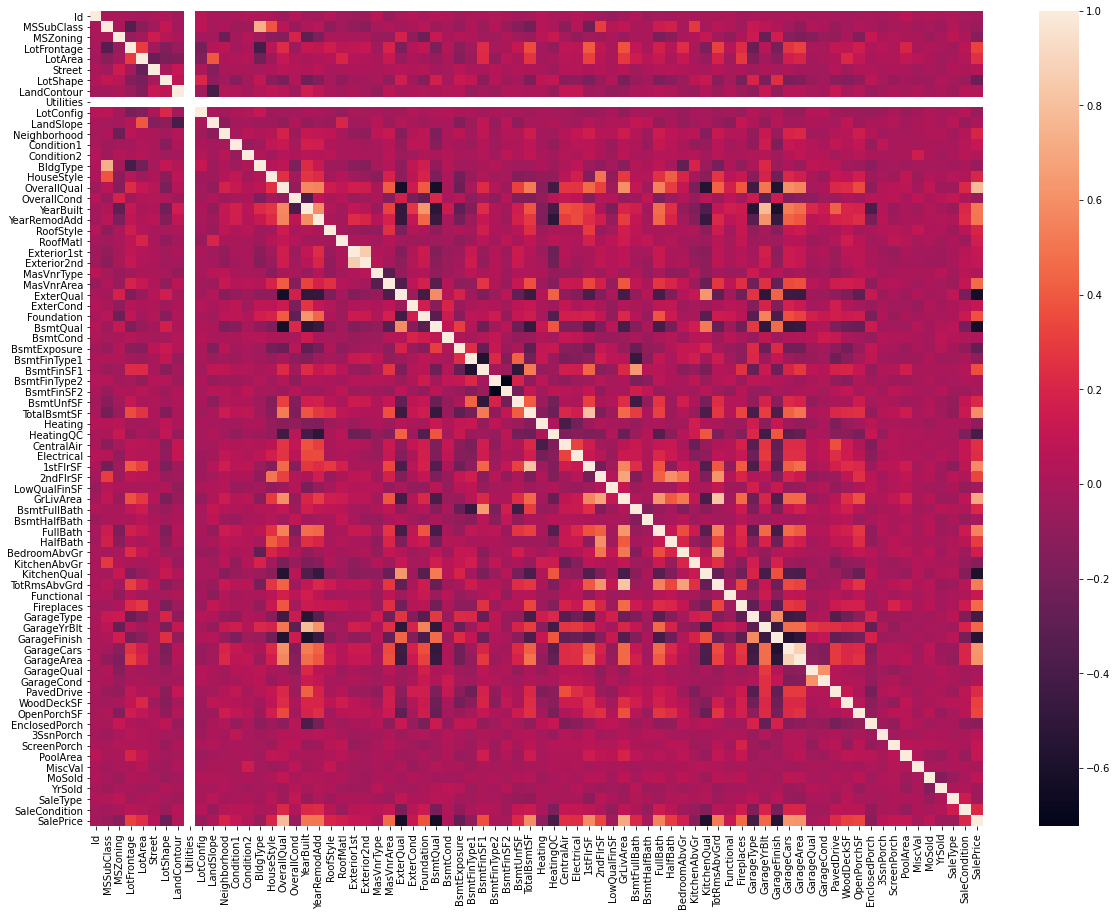

In [620]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [621]:
#utilities has no correlation with any input column as well as the target column
#so we are dropping the utilities column
df=df.drop(columns=['Utilities'],axis=1)
df1=df1.drop(columns=['Utilities'],axis=1)

In [631]:
df.corr()['SalePrice'].sort_values(ascending=False)[0:20]

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
MasVnrArea      0.466386
Fireplaces      0.459611
GarageYrBlt     0.453840
Foundation      0.374169
BsmtFinSF1      0.362874
OpenPorchSF     0.339500
2ndFlrSF        0.330386
LotFrontage     0.323779
WoodDeckSF      0.315444
Name: SalePrice, dtype: float64

In [632]:
df.corr()['SalePrice'].sort_values(ascending=False)[20:40]

HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea         0.103280
ScreenPorch      0.100284
Exterior2nd      0.097541
Name: SalePrice, dtype: float64

In [633]:
df.corr()['SalePrice'].sort_values(ascending=False)[40:60]

MoSold          0.072764
3SsnPorch       0.060119
Street          0.044753
Condition2      0.033956
LandContour     0.032836
GarageCond      0.023187
MasVnrType      0.022340
LandSlope       0.015485
BsmtCond        0.012224
BsmtFinType2    0.007464
BsmtFinSF2     -0.010151
GarageQual     -0.010948
BsmtHalfBath   -0.011109
MiscVal        -0.013071
Id             -0.023897
LowQualFinSF   -0.032381
YrSold         -0.045508
SaleType       -0.050851
LotConfig      -0.060452
MSSubClass     -0.060775
Name: SalePrice, dtype: float64

In [ ]:
df_rev=df.drop(columns=['MS'],axis=1)
df1_rev=df1.drop(columns=[''],axis=1)
df_irev=df.drop(columns=['MS'],axis=1)
df1_rev=df1.drop(columns=[''],axis=1)


In [634]:
df.corr()['SalePrice'].sort_values(ascending=False)[60:80]

OverallCond     -0.065642
BldgType        -0.066028
Heating         -0.100021
BsmtFinType1    -0.103033
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
MSZoning        -0.133221
LotShape        -0.248171
BsmtExposure    -0.282480
HeatingQC       -0.406604
GarageType      -0.415370
GarageFinish    -0.550624
KitchenQual     -0.592468
ExterQual       -0.624820
BsmtQual        -0.628798
Name: SalePrice, dtype: float64